In [1]:
%%capture
# !pip install -U flash-attn --no-build-isolation
!pip install transformers accelerate optimum
!pip install nltk
!pip install git+https://github.com/coqui-ai/TTS
print("Done")

In [2]:
from transformers import AutoProcessor, BarkModel, AutoTokenizer
import optimum
import os
from os import listdir
from os.path import isfile, join
# import shlex
from optimum.bettertransformer import BetterTransformer
import torch
import scipy
from scipy.io.wavfile import write as write_wav
from IPython.display import Audio
import numpy as np
import wave
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import SnowballStemmer, PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import wordnet, stopwords
from nltk.stem.snowball import GermanStemmer

/home/changgeng/anaconda3/envs/torchi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/changgeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/changgeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/changgeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/changgeng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
os.environ["SUNO_OFFLOAD_CPU"] = "TRUE"
os.environ["SUNO_USE_SMALL_MODELS"] = "TRUE"

In [4]:
# commandline_args = os.environ.get('COMMANDLINE_ARGS', "--skip-torch-cuda-test --no-half")
# shlex.split(commandline_args)

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "suno/bark-small"
model = BarkModel.from_pretrained(model_id, torch_dtype=torch.float32).to(device)
# model = BarkModel.from_pretrained("suno/bark-small", torch_dtype=torch.float16, attn_implementation="flash_attention_2").to(device)
# model =  BetterTransformer.transform(model)

/home/changgeng/anaconda3/envs/torchi/lib/python3.12/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [6]:
processor = AutoProcessor.from_pretrained("suno/bark")
# tokenizer = AutoTokenizer.from_pretrained(model_id)
model = BarkModel.from_pretrained(model_id)
voice_preset = "v2/de_speaker_2"
sample_rate = model.generation_config.sample_rate

In [7]:
poem = """Wer reitet so spät durch Nacht und Wind?
Es ist der Vater mit seinem Kind;
er hat den Knaben wohl in dem Arm,
er fasst ihn sicher, er hält ihn warm.

Mein Sohn, was birgst du so bang dein Gesicht? –
Siehst Vater, du den Erlkönig nicht?
Den Erlenkönig mit Kron' und Schweif? –
Mein Sohn, es ist ein Nebelstreif.

„Du liebes Kind, komm, geh mit mir!
Gar schöne Spiele spiel' ich mit dir;
manch bunte Blumen sind an dem Strand,
meine Mutter hat manch gülden Gewand.“

Mein Vater, mein Vater, und hörest du nicht,
was Erlenkönig mir leise verspricht? –
Sei ruhig, bleibe ruhig, mein Kind:
In dürren Blättern säuselt der Wind.

„Willst, feiner Knabe, du mit mir gehn?
Meine Töchter sollen dich warten schön;
meine Töchter führen den nächtlichen Reihn,
und wiegen und tanzen und singen dich ein.“

Mein Vater, mein Vater und siehst du nicht dort
Erlkönigs Töchter am düstern Ort? –
Mein Sohn, mein Sohn, ich seh' es genau:
Es scheinen die alten Weiden so grau.

„Ich liebe dich, mich reizt deine schöne Gestalt;
und bist du nicht willig, so brauch ich Gewalt.“
Mein Vater, mein Vater, jetzt fasst er mich an!
Erlkönig hat mir ein Leids getan! –

Dem Vater grauset's, er reitet geschwind,
er hält in Armen das ächzende Kind,
erreicht den Hof mit Mühe und Not;
in seinen Armen das Kind war tot.
""".split("\n")
poetry = poem
poem = [i for i in poem if len(i) > 1]

In [15]:
audio_array

tensor([[-3.8615e-05, -2.2414e-03, -1.7469e-03,  ..., -1.2887e-02,
         -1.3720e-02, -1.1812e-02]], device='cuda:0')

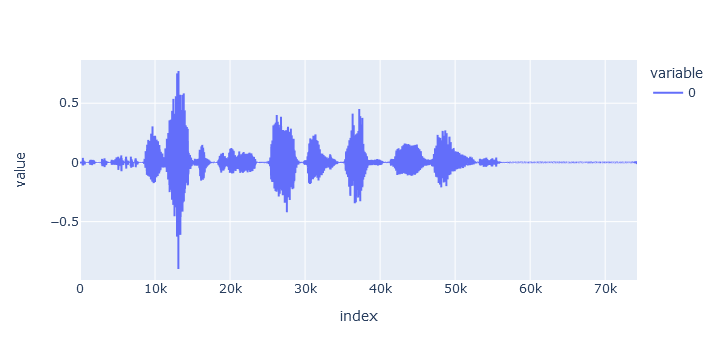

In [18]:
import plotly.express as px
px.line(audio_array[0].cpu())

In [8]:
audios_list = []
for idx, phrases in enumerate(poem):
    inputs = processor(phrases, voice_preset=voice_preset, return_tensors="pt")
    audio_array = model.generate(**inputs, do_sample=True).to(device) 
    print("inputs", inputs)
    print(audio_array[0])
    print(len(audio_array[0]))
    print(audio_array[0])
    
    break
    audio_array = audio_array.cpu().numpy().squeeze()
    if idx < 10:
        version_3_path = f"./Audio-Ordner/Version_03_0{idx}.wav"
    else:
        version_3_path = f"./Audio-Ordner/Version_03_{idx}.wav"
    
    write_wav(version_3_path, sample_rate, audio_array)
    display(Audio(version_3_path, autoplay=False))
    if idx == 5:
        break

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


inputs {'input_ids': tensor([[70061, 14243, 12392, 10380, 32650, 17615, 10714, 31312, 10130, 22830,
           136,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,  

In [9]:
for input_id in inputs['input_ids']:
    print(processor.tokenizer.decode(input_id))
    

Wer reitet so spät durch Nacht und Wind? [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

In [10]:
!pip install pydub

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [11]:
from pydub import AudioSegment
import os

# Pfad zum Audio-Ordner
mypath = "./Audio-Ordner/"
# Ausgabe-Datei
output_file = "./final_Audio/combined.wav"

# Liste aller Wave-Dateien im Audio-Ordner
input_files = [os.path.join(mypath, f) for f in os.listdir(mypath) if f.endswith('.wav')]

# Lade die Wave-Dateien und kombiniere sie
combined = None
for input_file in input_files:
    sound = AudioSegment.from_wav(input_file)
    if combined is None:
        combined = sound
    else:
        combined += sound

# Speichere die kombinierte Datei
combined.export(output_file, format="wav")

print("Wave-Dateien wurden kombiniert und gespeichert als:", output_file)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Wave-Dateien wurden kombiniert und gespeichert als: ./final_Audio/combined.wav


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [12]:
def combine_wave_files(output_file, input_file):
    
    with wave.open(input_file[0], 'rb') as wave_file:
        params = wave_file.getparams()

    with wave.open(output_file[0], 'wb') as output:
        output.setparams(params)

    for file in input_files:
        with wave.open(file, 'rb') as wave_file:
            data = wave_file.readframes(wave_file.getnframes())
            output.writeframes(data)

mypath = "./Audio-Ordner/"
input_files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]
output_file = "./final_Audio/combined.wav"
combine_wave_files(output_file, input_files)
input_files

Error: unknown format: 3

In [ ]:
display(Audio(output_file, autoplay=False))

In [ ]:
# ======================================================================

In [ ]:
for idx, phrases in enumerate(poem):
    inputs = processor(phrases, voice_preset=voice_preset)
    audio_array = model.generate(**inputs, do_sample=True).to(device) 
    audio_array = audio_array.cpu().numpy().squeeze()
    
    sample_rate = model.generation_config.sample_rate
    version_3_path = f"./Audio-Ordner/Version_03_{idx}.wav"
    write_wav(version_3_path, sample_rate, audio_array)

    
    display(Audio(version_3_path, autoplay=False))


In [ ]:
'''
silence = np.zeros(int(0.25)*sample_rate)
pieces = []

for sentences in poetry:
    audio_array = processor(sentences, history_prompt=voice_preset)
    pieces += [audio_array, silence.copy()]
'''


In [ ]:
# ==============================================================================

In [ ]:
audios_list = []
for paragraph in p:
    inputs = processor(paragraph, voice_preset=voice_preset, return_tensors="pt", return_token_type_ids=True, return_attention_mask=True).to(device) # return_tensors="np"
    with torch.no_grad():
        output = model(**inputs).waveform
    audios_list.append(output.cpu())
audios = torch.cat(audios_list, dim=1)
scipy.io.wavfile.write(path, rate=model.generation_config.sample_rate, data=audios.float.numpy().T)
display(Audio(path, autoplay=True))

In [ ]:
inputs['input_ids']

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-deu")
inputs_facebook = tokenizer(gedicht[0:5])
inputs_facebook

In [ ]:
inputs_facebook['input_ids']

In [ ]:
# tokenizer.decode()
tokenizer.decode(inputs_facebook['input_ids'])

In [ ]:
audio_array = model.generate(**inputs, do_sample=True).to(device)
audio_array = audio_array.cpu().numpy().squeeze()

In [ ]:
# audio_array = audio_array.squeeze()
sample_rate = model.generation_config.sample_rate

In [ ]:
version_2_path = "Version_02_gedicht.wav"
write_wav(version_2_path, sample_rate, audio_array)
# scipy.io.wavfile.write(version_2_path, rate=24000, data=audio_array)
display(Audio(version_2_path, autoplay=True))

In [ ]:
# Bark hat auch eine generate Funktion
# https://stackoverflow.com/questions/76266716/text-to-speech-convert-to-wav-in-python